# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

# importと関数定義

In [3]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# 確率勾配降下法

ストリーミング出力は最後の 5000 行に切り捨てられました。
*** 偏微分_バイアス2 ***
-0.16480182909613417

##### 順伝播開始 #####
*** 総入力1 ***
[-0.1403317   0.6418973  -0.79428464 -0.98083302 -0.21793783 -1.49730045
  0.04533177  1.67290591 -1.25506537  0.0523943 ]

*** 中間層出力1 ***
[0.         0.6418973  0.         0.         0.         0.
 0.04533177 1.67290591 0.         0.0523943 ]

*** 総入力2 ***
1.4244187253177827

*** 出力1 ***
1.4244187253177827

出力合計: 1.4244187253177827

##### 誤差逆伝播開始 #####
*** 偏微分_重み1 ***
[[-0.01615882 -0.00072258 -0.01372269 -0.00642996 -0.01112494  0.01951516
  -0.03096953 -0.01040175 -0.03160896 -0.02413361]
 [-0.0336203  -0.0015034  -0.02855164 -0.01337828 -0.02314672  0.04060355
  -0.06443567 -0.02164203 -0.06576608 -0.05021276]]

*** 偏微分_重み2 ***
[ 0.         -0.24662456  0.          0.          0.          0.
 -0.01741701 -0.64275031  0.         -0.02013051]

*** 偏微分_バイアス1 ***
[-0.06398049 -0.00286102 -0.05433467 -0.02545928 -0.04404895  0.07726983
 -0.12262311 -0.04118547 -0.12515493 -0.09555646]


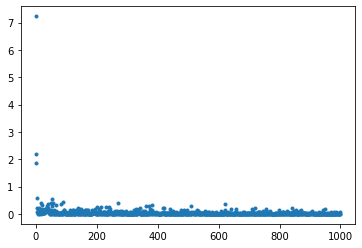

In [4]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

## 試してみよう
    z1 = functions.sigmoid(u1)

ストリーミング出力は最後の 5000 行に切り捨てられました。
2.9344406165233803

*** 出力1 ***
2.9344406165233803

出力合計: 2.9344406165233803

##### 誤差逆伝播開始 #####
*** 偏微分_重み1 ***
[[-0.00260955 -0.00230669  0.00213064  0.00337816  0.00868174  0.00745103
   0.00775167 -0.00043385 -0.00430866 -0.003282  ]
 [-0.00342941 -0.0030314   0.00280004  0.00443951  0.01140936  0.00979198
   0.01018708 -0.00057016 -0.00566235 -0.00431313]]

*** 偏微分_重み2 ***
[-1.17776339e-02 -1.96117316e-02 -1.19993182e-03 -6.48977025e-03
 -3.11846529e-04 -4.56050924e-05 -8.51874514e-03 -1.73515430e-02
 -2.18140450e-02 -2.37223989e-02]

*** 偏微分_バイアス1 ***
[-0.0049637  -0.00438762  0.00405276  0.00642571  0.01651381  0.01417284
  0.01474469 -0.00082525 -0.00819564 -0.00624279]

*** 偏微分_バイアス2 ***
-0.02453379604541661

##### 順伝播開始 #####
*** 総入力1 ***
[-0.43824592  1.93615133 -2.47809425 -1.05312405 -5.09000512 -6.95954991
 -1.0107801   0.93255457  1.68831074  3.70236455]

*** 中間層出力1 ***
[3.92159011e-01 8.73928718e-01 7.74081938e-02 2.58625649e-01
 6.12029

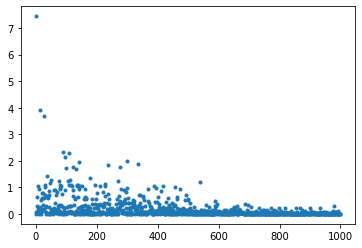

In [5]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    #z1 = functions.relu(u1)
    
    ## 試してみよう
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

 # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

ストリーミング出力は最後の 5000 行に切り捨てられました。
[-2.34383426 -2.06641227 -0.75325467 -1.62040855 -2.5030572   2.67905485
  1.86025334  0.18622783 -0.32021129  1.68460343]

*** 中間層出力1 ***
[0.         0.         0.         0.         0.         2.67905485
 1.86025334 0.18622783 0.         1.68460343]

*** 総入力2 ***
3.8559561406665224

*** 出力1 ***
3.8559561406665224

出力合計: 3.8559561406665224

##### 誤差逆伝播開始 #####
*** 偏微分_重み1 ***
[[ 0.          0.          0.          0.          0.         -0.00379508
   0.00061356  0.00284089  0.         -0.00132994]
 [ 0.          0.          0.          0.          0.         -0.00265477
   0.0004292   0.00198729  0.         -0.00093033]]

*** 偏微分_重み2 ***
[ 0.          0.          0.          0.          0.         -0.00847806
 -0.0058869  -0.00058933  0.         -0.00533104]

*** 偏微分_バイアス1 ***
[ 0.          0.          0.          0.          0.         -0.00432606
  0.0006994   0.00323836  0.         -0.00151601]

*** 偏微分_バイアス2 ***
-0.00316456952338795

##### 順伝播開始 ##

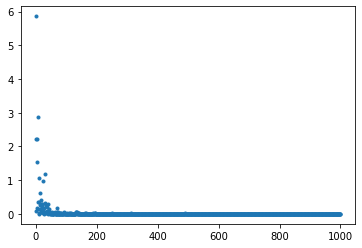

In [6]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    #delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値

ストリーミング出力は最後の 5000 行に切り捨てられました。
出力合計: -9.366851536420617

##### 誤差逆伝播開始 #####
*** 偏微分_重み1 ***
[[  7.04861523  -7.32231476  -5.55527712  -7.72107533  -7.38565527
   -5.15064404   5.91710334  -6.29980673 -10.65260221   8.29088933]
 [  6.92948643  -7.19856015  -5.46138726  -7.59058126  -7.26083015
   -5.06359289   5.81709825  -6.19333356 -10.47256234   8.15076483]]

*** 偏微分_重み2 ***
[4.81618908e+000 5.44674349e-121 2.80742257e-085 1.01357542e-142
 2.37377572e-137 6.26685139e-054 4.81618908e+000 4.30822177e-091
 1.55975646e-118 4.81618908e+000]

*** 偏微分_バイアス1 ***
[-2.46807575  2.56391176  1.94518274  2.70353795  2.58609047  1.80350029
 -2.07187636  2.20588012  3.73001338 -2.90305857]

*** 偏微分_バイアス2 ***
4.816189079817942

##### 順伝播開始 #####
*** 総入力1 ***
[ 472.77874125 -333.25302633 -239.16611382 -396.62927391 -381.42710762
 -152.68993088  361.15080718 -251.89226227 -331.86728247  515.67608526]

*** 中間層出力1 ***
[1.00000000e+000 1.86229976e-145 1.35355688e-104 5.57307616e-173
 2.23003619e-166 4.

/content/drive/My Drive/DNN_code/common/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ストリーミング出力は最後の 5000 行に切り捨てられました。

*** 出力1 ***
8.601287282266245

出力合計: 8.601287282266245

##### 誤差逆伝播開始 #####
*** 偏微分_重み1 ***
[[-2.17897626  0.81133324  1.22148152  1.17796637  0.62969716  0.87727426
  -2.37131185  0.70518206  1.90600803 -2.93530932]
 [ 0.34141672 -0.12712517 -0.19138998 -0.18457173 -0.09866521 -0.13745726
   0.37155316 -0.11049269 -0.29864622  0.4599241 ]]

*** 偏微分_重み2 ***
[1.30199439e-238 1.28664470e+000 1.28664470e+000 1.28664470e+000
 1.28664470e+000 1.28664470e+000 1.92448430e-199 1.28664470e+000
 1.28664470e+000 0.00000000e+000]

*** 偏微分_バイアス1 ***
[-0.80032555  0.29799807  0.44864319  0.43266033  0.23128417  0.32221783
 -0.87096931  0.25900935  0.70006588 -1.07812237]

*** 偏微分_バイアス2 ***
1.2866447028554617

##### 順伝播開始 #####
*** 総入力1 ***
[ 1205.10019392  -749.94850883  -769.82926447  -980.93882463
  -756.60119893  -500.75381945  1001.28437414  -592.04249461
 -1423.17151901  1588.50914071]

*** 中間層出力1 ***
[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+

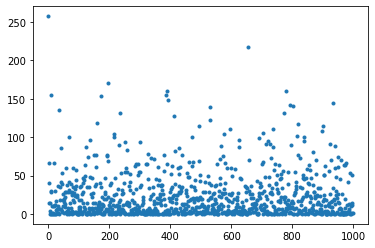

In [8]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    #data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()